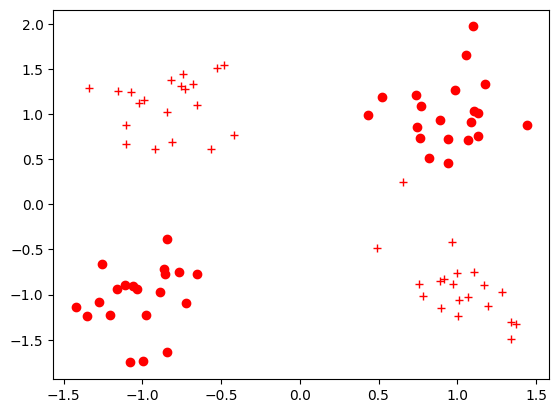

In [1]:
import torch
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

def label_map(y_, from_, to_):
    y = np.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0,1], 0)
y_train = label_map(y_train, [2,3], 1)
y_test = label_map(y_test, [0,1], 0)
y_test = label_map(y_test, [2,3], 1)

def vis_data(x,y = None, c = 'r'):
    if y is None:
        y = [None]*len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*', markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [2]:
x_train = torch.FloatTensor(x_train)
print(x_train.shape)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

torch.Size([80, 2])


In [3]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):

        super(NeuralNet, self).__init__()

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output
    
model = NeuralNet(2,5)
learning_rate = 0.03
criterion = torch.nn.BCELoss()
epochs = 2000
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print('Before Training, test loss is {}'.format(test_loss_before.item()))

Before Training, test loss is 0.6351137757301331


In [4]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    if epoch % 100 == 0:
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.6411651968955994
Train loss at 100 is 0.5227241516113281
Train loss at 200 is 0.4039413034915924
Train loss at 300 is 0.31235694885253906
Train loss at 400 is 0.24787993729114532
Train loss at 500 is 0.2027807980775833
Train loss at 600 is 0.16968582570552826
Train loss at 700 is 0.14563848078250885
Train loss at 800 is 0.12756486237049103
Train loss at 900 is 0.1134803295135498
Train loss at 1000 is 0.10221602767705917
Train loss at 1100 is 0.09296892583370209
Train loss at 1200 is 0.08523440361022949
Train loss at 1300 is 0.07867167890071869
Train loss at 1400 is 0.07303012907505035
Train loss at 1500 is 0.06825165450572968
Train loss at 1600 is 0.06409657746553421
Train loss at 1700 is 0.060435764491558075
Train loss at 1800 is 0.057181186974048615
Train loss at 1900 is 0.054269708693027496


In [5]:
model.eval()
test_loss = criterion(torch.squeeze(model(x_test)), y_test)
print('After Training, test loss is {}'.format(test_loss.item()))

After Training, test loss is 0.06291265785694122


In [6]:
torch.save(model.state_dict(), './model.pt')
print('state_dict format of the model: {}'.format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[-1.9049, -1.4541],
        [-0.4781,  0.3462],
        [ 1.5272,  1.8041],
        [-1.3343,  1.2826],
        [-0.0030, -0.2908]])), ('linear_1.bias', tensor([ 0.0301, -0.2427, -0.3950, -0.1641, -0.4300])), ('linear_2.weight', tensor([[-2.2886,  0.4722, -2.3458,  1.6360, -0.4155]])), ('linear_2.bias', tensor([2.2979]))])


In [7]:
new_model = NeuralNet(2,5)
new_model.load_state_dict(torch.load('./model.pt'))
new_model.eval()
print('벡터 [-1,1]이 레이블 1을 가질 확률은 {}'.format(new_model(torch.FloatTensor([-1,1])).item()))

벡터 [-1,1]이 레이블 1을 가질 확률은 0.9958682060241699
